# Truncated Power Basis Functions

## Mathematical Background

For a k-th order spline with knots at $t_1 < \dots < t_m$, the truncated power basis consists of $(m+k+1)$ functions:

- Polynomial terms: $g_1(x) = 1, g_2(x) = x, \dots, g_{k+1}(x) = x^k$
- Truncated power terms: $g_{k+1+j}(x) = (x - t_j)_+^k$, for $j = 1, \dots, m$

where $(x)_+ = \max(x, 0)$ is the positive part function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')

from splines import truncated_power, truncated_power_basis_matrix
from utils import plot_basis_functions

%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

Visualize the basic building block: $(x - t)_+^k$ for different degrees.

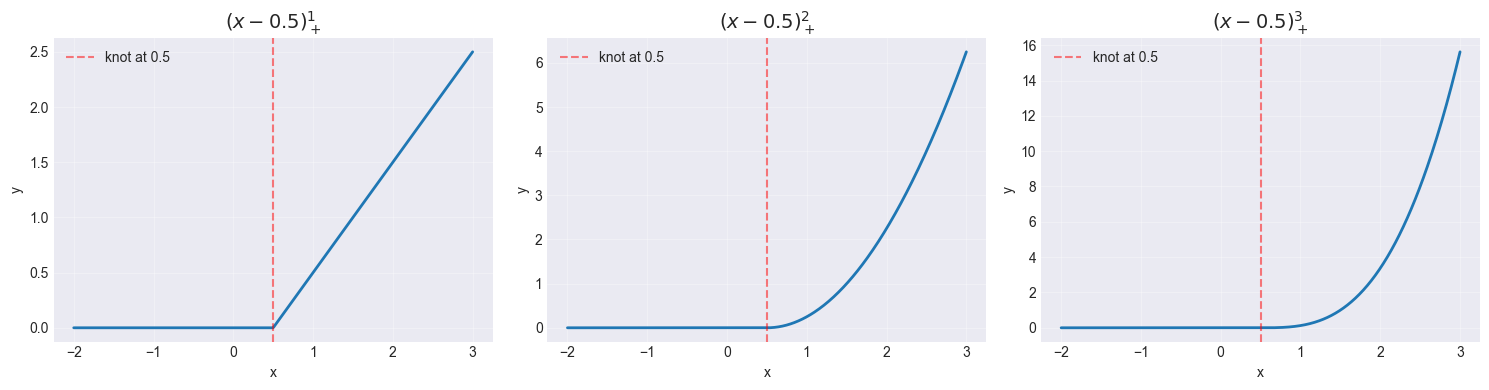

In [2]:
x = np.linspace(-2, 3, 500)
knot = 0.5

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

degrees = [1, 2, 3]
for ax, degree in zip(axes, degrees):
    y = truncated_power(x, knot, degree)
    ax.plot(x, y, linewidth=2)
    ax.axvline(knot, color='r', linestyle='--', alpha=0.5, label=f'knot at {knot}')
    ax.set_title(f'$(x - {knot})_+^{degree}$', fontsize=14)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 2. Cubic Spline Basis Functions

For **cubic splines** (degree 3) with 3 interior knots, we have $3 + 3 + 1 = 7$ basis functions:
- $g_1(x) = 1$
- $g_2(x) = x$
- $g_3(x) = x^2$
- $g_4(x) = x^3$
- $g_5(x) = (x - t_1)_+^3$
- $g_6(x) = (x - t_2)_+^3$
- $g_7(x) = (x - t_3)_+^3$

In [3]:
x = np.linspace(0, 10, 500)
knots = np.array([3.0, 5.0, 7.0])
degree = 3

basis_matrix = truncated_power_basis_matrix(x, knots, degree)

print(f"Basis matrix shape: {basis_matrix.shape}")
print(f"Number of basis functions: {basis_matrix.shape[1]}")
print(f"Expected: m + k + 1 = {len(knots)} + {degree} + 1 = {len(knots) + degree + 1}")

Basis matrix shape: (500, 7)
Number of basis functions: 7
Expected: m + k + 1 = 3 + 3 + 1 = 7


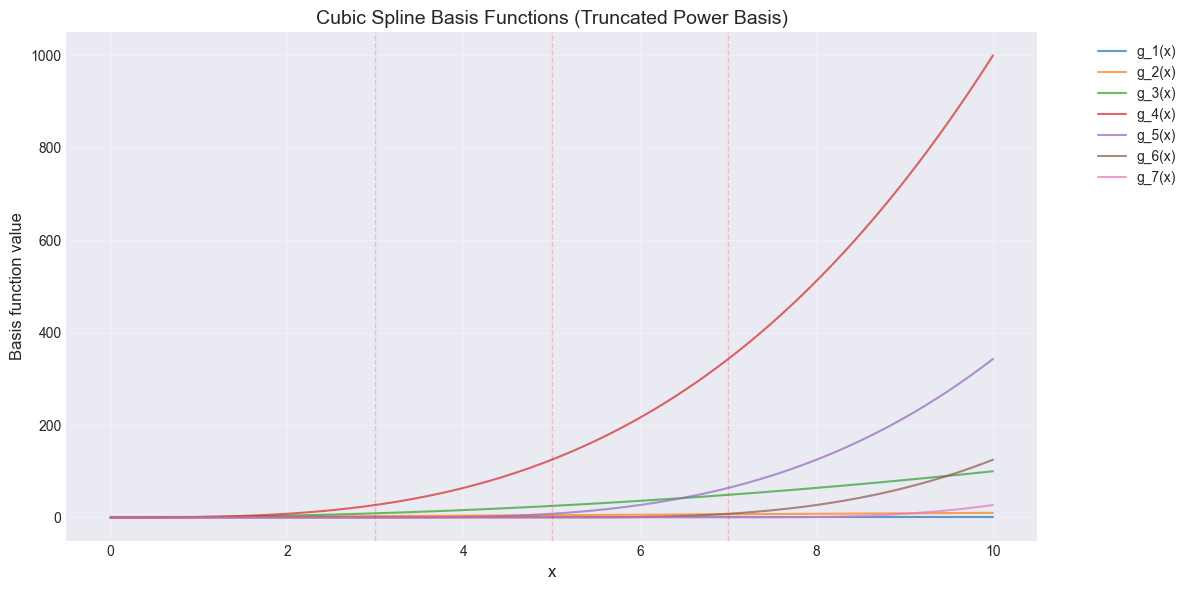

In [4]:
fig = plot_basis_functions(x, basis_matrix, knots, 
                           title="Cubic Spline Basis Functions (Truncated Power Basis)",
                           max_functions=7)
plt.show()

## 3. Polynomial Terms vs Truncated Terms

Let's separate and visualize the polynomial terms and truncated power terms.

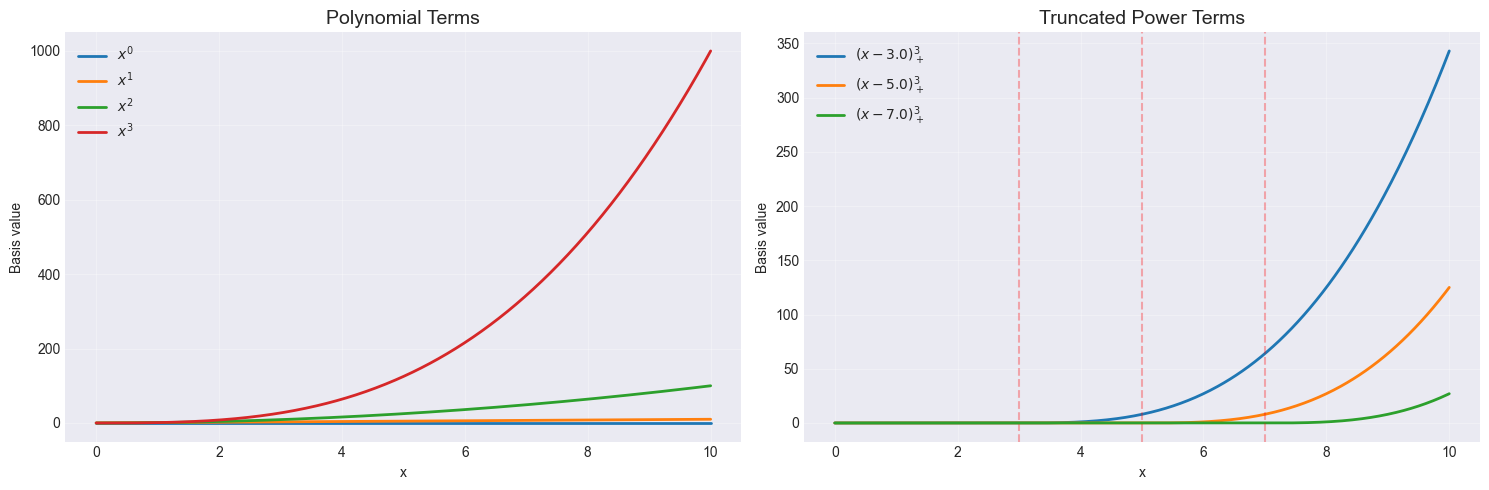

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

ax = axes[0]
for i in range(degree + 1):
    ax.plot(x, basis_matrix[:, i], label=f'$x^{i}$', linewidth=2)
ax.set_title('Polynomial Terms', fontsize=14)
ax.set_xlabel('x')
ax.set_ylabel('Basis value')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[1]
for j, knot in enumerate(knots):
    ax.plot(x, basis_matrix[:, degree + 1 + j], label=f'$(x - {knot})_+^3$', linewidth=2)
    ax.axvline(knot, color='red', linestyle='--', alpha=0.3)
ax.set_title('Truncated Power Terms', fontsize=14)
ax.set_xlabel('x')
ax.set_ylabel('Basis value')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Effect of Polynomial Degree

Compare basis functions for different polynomial degrees (linear, quadratic, cubic).

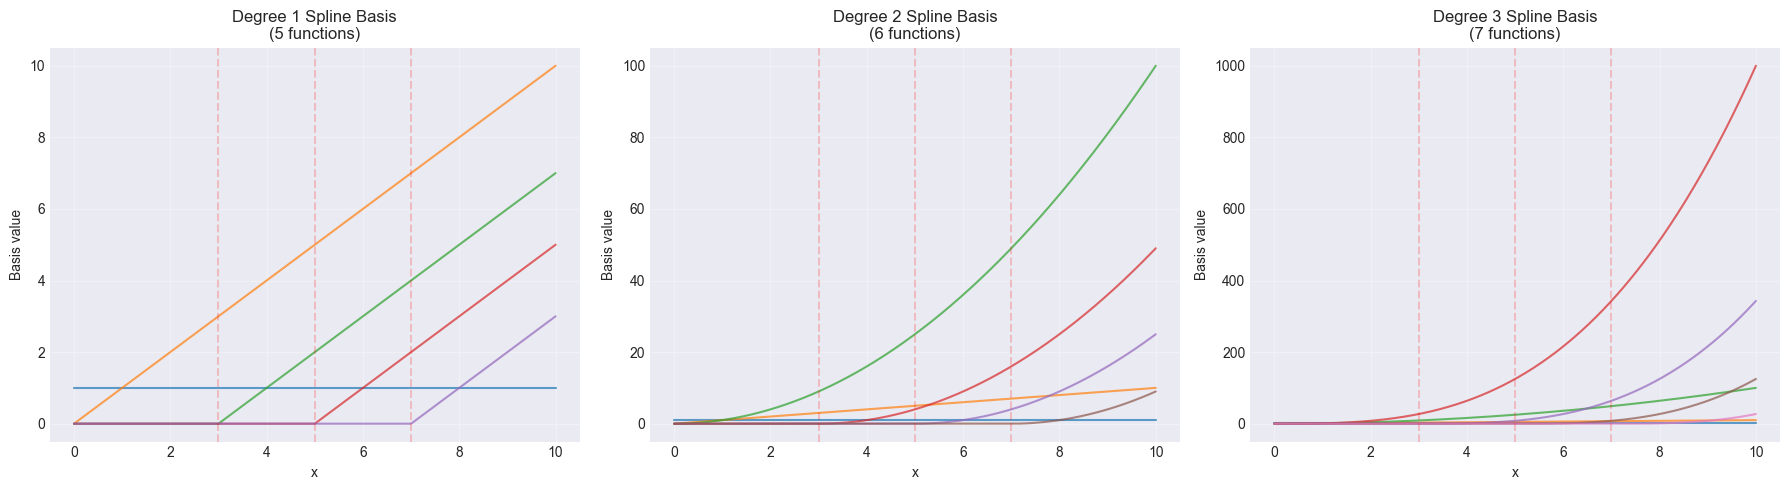

In [6]:
x = np.linspace(0, 10, 500)
knots = np.array([3.0, 5.0, 7.0])
degrees = [1, 2, 3]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, degree in zip(axes, degrees):
    basis_matrix = truncated_power_basis_matrix(x, knots, degree)
    
    for i in range(basis_matrix.shape[1]):
        ax.plot(x, basis_matrix[:, i], alpha=0.7)
    
    for knot in knots:
        ax.axvline(knot, color='r', linestyle='--', alpha=0.2)
    
    ax.set_title(f'Degree {degree} Spline Basis\n({len(knots) + degree + 1} functions)', fontsize=12)
    ax.set_xlabel('x')
    ax.set_ylabel('Basis value')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Constructing a Spline from Basis Functions

Any spline can be written as a linear combination of basis functions:
$$f(x) = \sum_{j=1}^{m+k+1} \beta_j g_j(x)$$

Let's create a spline by choosing coefficients manually.

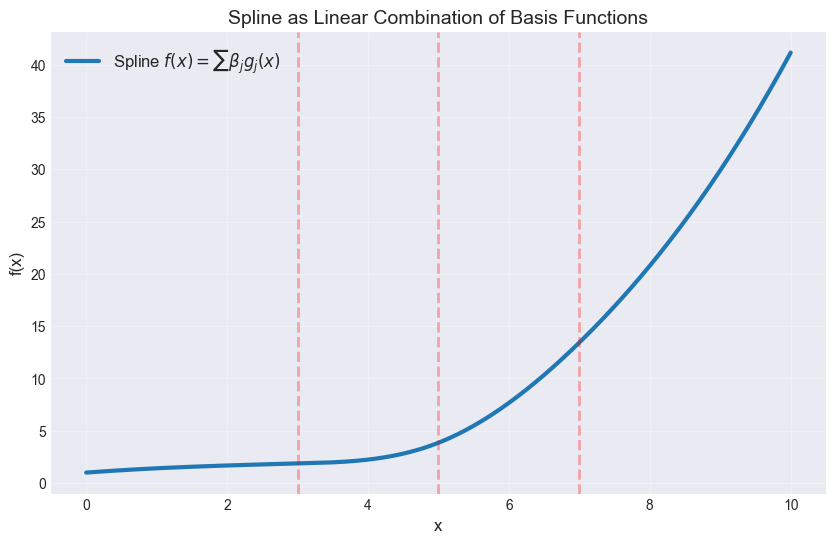

Coefficients β:
  β_1 = 1.000
  β_2 = 0.500
  β_3 = -0.100
  β_4 = 0.010
  β_5 = 0.200
  β_6 = -0.300
  β_7 = 0.150


In [7]:
x = np.linspace(0, 10, 500)
knots = np.array([3.0, 5.0, 7.0])
degree = 3

G = truncated_power_basis_matrix(x, knots, degree)

beta = np.array([1.0, 0.5, -0.1, 0.01, 0.2, -0.3, 0.15])

f_x = G @ beta

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, f_x, linewidth=3, label='Spline $f(x) = \sum \\beta_j g_j(x)$')

for knot in knots:
    ax.axvline(knot, color='r', linestyle='--', alpha=0.3, linewidth=2)

ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('f(x)', fontsize=12)
ax.set_title('Spline as Linear Combination of Basis Functions', fontsize=14)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)
plt.show()

print("Coefficients β:")
for i, b in enumerate(beta):
    print(f"  β_{i+1} = {b:.3f}")

## Key Takeaways

1. **Truncated power basis** provides a natural parametrization for splines
2. For degree $k$ with $m$ knots, we need $m + k + 1$ basis functions
3. The basis consists of:
   - Global polynomial terms: $1, x, x^2, \dots, x^k$
   - Local truncated terms: $(x - t_j)_+^k$ that "activate" at each knot
4. Higher degree → more basis functions → more flexible splines
5. Cubic splines (degree 3) are most common in practice